In [145]:
# Load autoreload extensions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression

Load training data

In [147]:
train_data = pd.read_csv('train.csv')
train_data

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


We have 90000x54 data

Looks like some columns have different format (integer, float, positive, limited to 0-1, etc)

`target` is a float number

Let's describe the data

In [148]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


Seems like part of the data comes from the same distribution

`#0-5 + #9-12` seems to be from the same distribution (from quantiles it looks uniform)

`#13-52` seems to be from the same distribution (also uniform)

`#6` is looks symmetric and centered around 0

`#8` is categorical `(0,1)`

`#7` is continuous from 0 to 1 

Check if there are any empty values

In [149]:
train_data.isna().sum().sum()

0

No empty values

Let's check the distribution of some features

<Axes: >

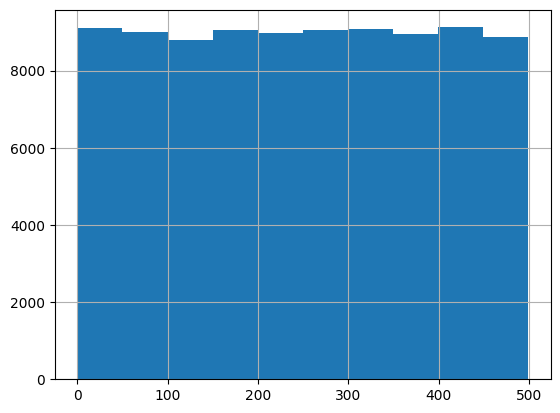

In [150]:
train_data["0"].hist()

Distribution looks uniform from 0 to 500

In [151]:
stats.kstest(train_data["0"], np.random.uniform(0, 500, 9000).round())

KstestResult(statistic=0.011533333333333284, pvalue=0.22477044782823163, statistic_location=405.0, statistic_sign=1)

`p-value > 0.05`, so we can assume that the data is uniformly distributed

Let's check another group of features #13-52

<Axes: >

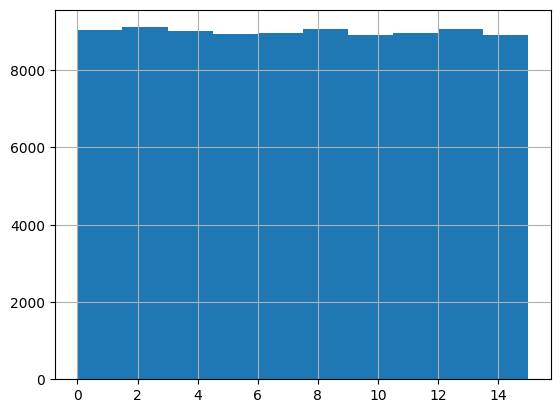

In [152]:
train_data["13"].hist()

In [153]:
stats.kstest(train_data["13"], np.random.uniform(0, 15, 9000))

KstestResult(statistic=0.01361111111111113, pvalue=0.09558763020044903, statistic_location=3.655298824031532, statistic_sign=1)

Also can assume uniform distribution

Check #6, #7, #8 that seems unique for the dataset

<Axes: >

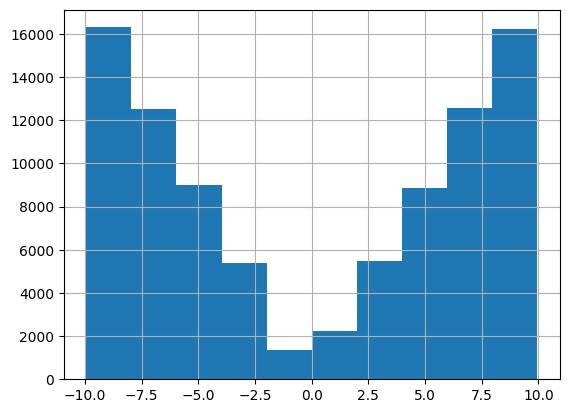

In [154]:
train_data["6"].hist()

<Axes: >

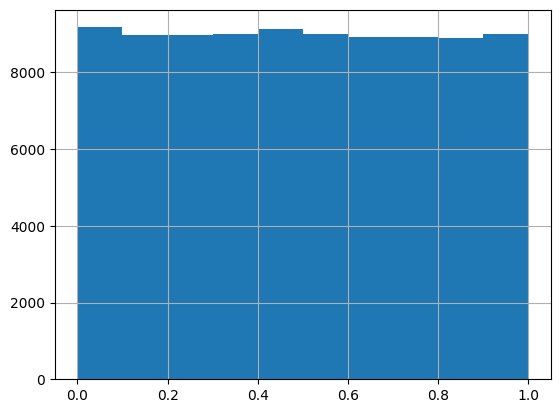

In [155]:
train_data["7"].hist()

<Axes: >

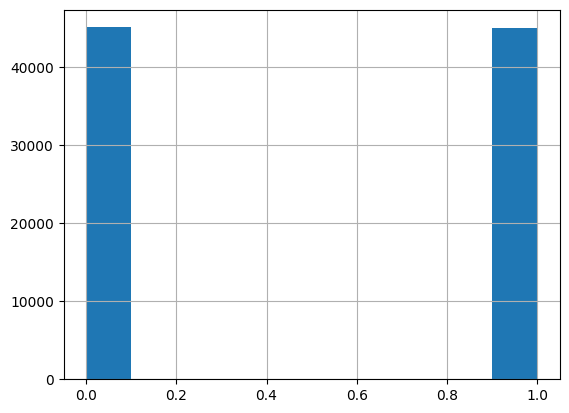

In [156]:
train_data["8"].hist()

#6 - symmetric, centered around 0. Seems like that's a square root of uniformly distributed samples (with negative part y= +-sqrt(x))

#7 - continuous uniform from 0 to 1

#8 - categorical (0, 1)

Let's check the linear correlation between features (including target)

In [157]:
corr_matrix = train_data.corr()
corr_matrix[corr_matrix < 0.01] = 0
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
6,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.940016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.012103
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.940016,0.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


For the most of the data there is no linear correlation

Exceptions: #6 and #8, #7 and target

Let's check the correlation between #6 and #8 more closely

<Axes: xlabel='6'>

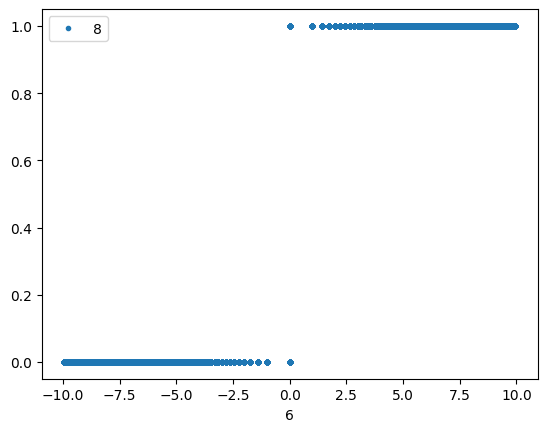

In [158]:
train_data.plot(x='6', y='8', style='.')

Now we can say that #8 is a quantized version of #6 using step function

<Axes: xlabel='7'>

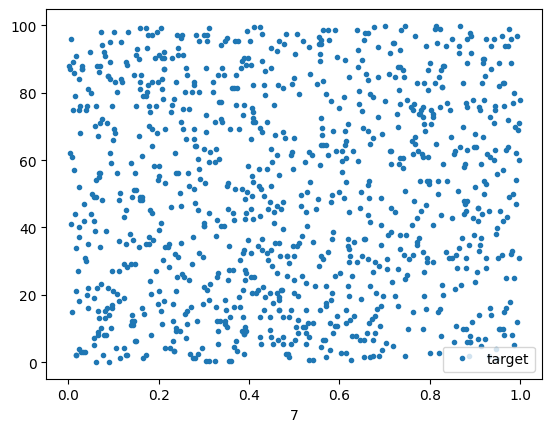

In [159]:
train_data[:1000].plot(x='7', y='target', style='.')

Correlation between #7 and target is not visible

Now let's check non-linear correlation (mutual information) between features and target

For time saving, let's use only several features that's seems the most representative

In [160]:
def calculate_mi(v1: np.ndarray, v2: np.ndarray):
    return mutual_info_regression(v1.reshape(-1, 1), v2)


corr_matrix = train_data[['0', '6', '7', '13', 'target']].corr(calculate_mi)

In [161]:
# Something weird with feature #6

corr_matrix

,0,6,7,13,target
0,1.000000,0.000000,0.001105,0.000264,0.001665
6,0.000000,1.000000,0.000000,0.000000,4.602137
7,0.001105,0.000000,1.000000,0.000022,1.274221
13,0.000264,0.000000,0.000022,1.000000,0.000000
target,0.001665,4.602137,1.274221,0.000000,1.000000


We still can see a correlation between #7 and target

And now we can see a strong correlation between #6 and target

So let's check the correlation between #6 and target more closely

<Axes: xlabel='6'>

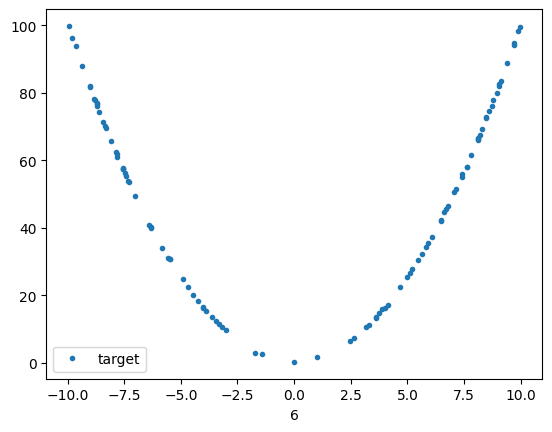

In [162]:
# The data is not random
train_data[:100].plot(x='6', y='target', style='.')

Ok. It looks quadratic and seems like that's a key to the solution

Dependency looks very strong

Let's prepare and train linear quadratic model for #6

In [163]:

x, y = train_data.drop("target", axis=1).values, train_data["target"].values
# Let split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [164]:
model = LinearRegression().fit((x_train[:, 6] ** 2).reshape(-1, 1), y_train)
y_predict = model.predict((x_test[:, 6] ** 2).reshape(-1, 1))

In [165]:
model.coef_

array([1.00002338])

From the coefficient we can see that the dependency is strongly quadratic

In [166]:
root_mean_squared_error(y_test, y_predict)

0.28841215886804766

The error is very small

Let's check the distribution of the error

(array([4585., 4486., 4509., 4520., 4619., 4480., 4529., 4410., 4449.,
        4413.]),
 array([-5.00720420e-01, -4.00533971e-01, -3.00347522e-01, -2.00161073e-01,
        -9.99746238e-02,  2.11825120e-04,  1.00398274e-01,  2.00584723e-01,
         3.00771172e-01,  4.00957621e-01,  5.01144070e-01]),
 <BarContainer object of 10 artists>)

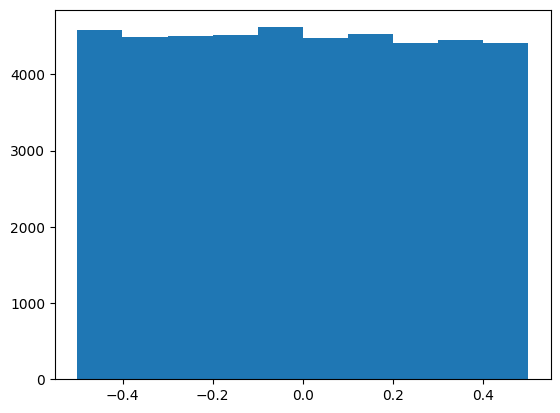

In [167]:
plt.hist(y_test - y_predict)

Ok. The error is uniformly distributed

It means that either the model has a uniform noise (less probable) or some other features are missing in training (more probable)

Let's check the correlation of the error with other features

In [168]:
corr_matrix = train_data.assign(error=y - model.predict((x[:, 6] ** 2).reshape(-1, 1))).corr()
corr_matrix[corr_matrix < 0.01] = 0
corr_matrix['error']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.999997
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
30        0.000000
31        0.000000
32        0.000000
33        0.000000
34        0.000000
35        0.000000
36        0.000000
37        0.000000
38        0.000000
39        0.000000
40        0.000000
41        0.000000
42        0.000000
43        0.000000
44        0.000000
45        0.000000
46        0.000000
47        0.000000
48        0.000000
49        0.000000
50        0.000000
51        0.000000
52        0.

We can see that #7 has a strong correlation with the error

So let's add #7 to the model

In [169]:
model = LinearRegression().fit(np.vstack((x_train[:, 6] ** 2, x_train[:, 7])).T, y_train)
y_predict = model.predict(np.vstack((x_test[:, 6] ** 2, x_test[:, 7])).T)

In [170]:
model.coef_

array([1., 1.])

In [171]:
root_mean_squared_error(y_test, y_predict)

4.083660436936568e-14

(array([5905., 5179., 6062., 9413., 7078., 4689., 2907., 1897., 1441.,
         429.]),
 array([-7.97140132e-14, -6.32160990e-14, -4.67181849e-14, -3.02202707e-14,
        -1.37223566e-14,  2.77555756e-15,  1.92734717e-14,  3.57713859e-14,
         5.22693000e-14,  6.87672141e-14,  8.52651283e-14]),
 <BarContainer object of 10 artists>)

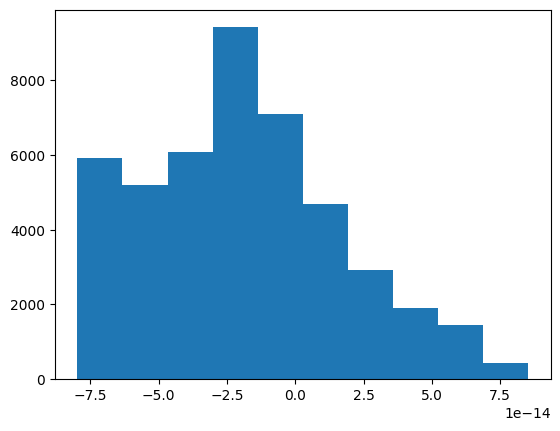

In [172]:
plt.hist(y_test - y_predict)

Coefs are 1, 1, RMSE is minimal

So now we can say that the model should be `y=#6^2 + #7`

All the other features are useless